# ORIE 4580/5580/5581 Assignment 3

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: https://github.com/rhweigle17/orie4580hw

(**Please replace this with your own link!**)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [ ]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)

In [ ]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output

In [ ]:
# Ans
x = LCG(17,16,5,0,1)
y = LCG(8,7,2,0,1)

[0.25  0.375 0.625 0.25  0.375 0.625 0.25  0.375]


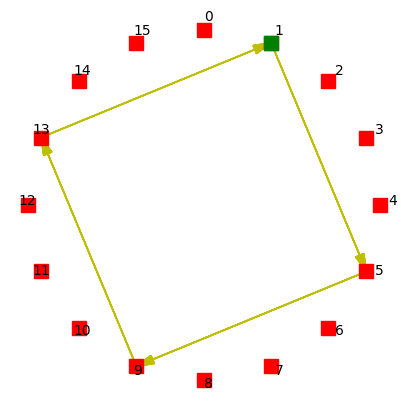

In [ ]:
fig = plt.figure(figsize=(5,5))
plot_clock_face(16,fig,annotate = True)
plot_clock_path(16,x,fig)
plt.axis('off')
plt.show()

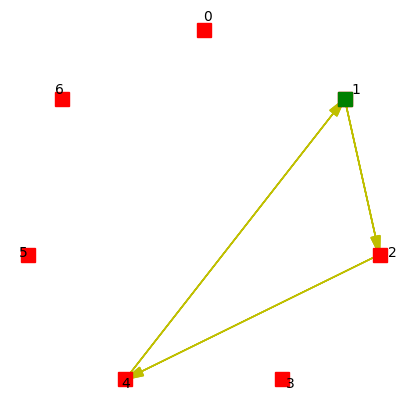

In [ ]:
fig = plt.figure(figsize=(5,5))

plot_clock_face(7,fig,annotate = True)
plot_clock_path(7,y,fig)
plt.axis('off')
plt.show()

<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

In [ ]:
x_seq = [1,5,9,13,1,5,9,13,1,5,9,13,1]
y_seq = [1,2,4,1,2,4,1,2,4,1,2,4,1]
z_seq = [(a + b) % 16 for a, b in zip(x_seq, y_seq)]
z_norm = [(c+1)/(16+1) for c in z_seq]
print(z_seq)
print(z_norm)

[2, 7, 13, 14, 3, 9, 10, 15, 5, 6, 11, 1, 2]
[0.17647058823529413, 0.47058823529411764, 0.8235294117647058, 0.8823529411764706, 0.23529411764705882, 0.5882352941176471, 0.6470588235294118, 0.9411764705882353, 0.35294117647058826, 0.4117647058823529, 0.7058823529411765, 0.11764705882352941, 0.17647058823529413]


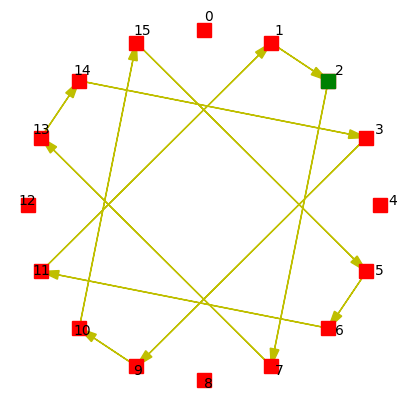

In [ ]:
fig = plt.figure(figsize=(5,5))

plot_clock_face(16,fig,annotate = True)
plot_clock_path(16,z_norm,fig)
plt.axis('off')
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.

$x_n$ has a period of 4

$y_n$ has a period of 3

$z_n$ has a period of 12


___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

Using the definition of pseudoinverse and the definition for F(x), we can find the pseudoinverse $F^{-1}(y)$.

**When 0$\leq$y$<$1/2:**

F(x)$\geq$y -> x$\geq$y

so $F^{-1}(y)$ = y for 0$\leq$y$\leq$1/2

**When y=1/2:**

The smallest value of x such that y=1/2 and F(x)$\geq$y  is 1/2. That is because F(1/2) = 1/2 $\geq$ 1/2. No values of x less than 1/2 give F(x) = 1/2.

**When 1/2$<$y$<$1:**

The smallest value of x such that 1/2$<$y$<$1 and F(x)$\geq$y is x=1, since 1/2 is not greater than the numbers in this range and there are no values of F(x) between 1/2 and 1.

**When y=1:**

The smallest value of x such that y=1 and F(x)$\geq$y is x=1.

Thus, the final pseudoinverse of F(x) is:

$$
F^{-1}(y) =
\begin{cases}
y, & 0 \le y < \frac{1}{2} \\[2mm]
\frac{1}{2}, & y = \frac{1}{2} \\[1mm]
1, & \frac{1}{2} < y \le 1
\end{cases}
$$


___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$

For geometric:

$$F^{-1}(y) = \inf\{x|1-(1-p)^k\geq y\}$$

We can then find k by:

$$1-(1-p)^k\geq y$$

$$(1-p)^k\leq 1- y$$

$$ k\geq ln(1- y) / ln(1-p)$$

Since k is integer, we want the ceiling of that equation.

Text(0, 0.5, 'Frequency')

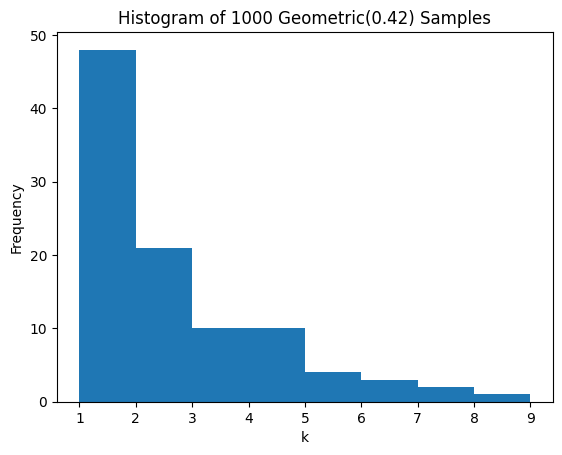

In [ ]:
p = 0.42
n = 100

y = np.random.uniform(0,1,n)
geometric_samples = np.ceil(np.log(1-y) / np.log(1-p)).astype(int)
plt.hist(geometric_samples, bins = range(1, max(geometric_samples)))
plt.title("Histogram of 1000 Geometric(0.42) Samples")
plt.xlabel("k")
plt.ylabel('Frequency')

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

We want to compute the CDF $F(x)$.

For $0 \leq x \leq 2$:

$$
F(x) = \int_{0}^{x} e^{t-2}\,dt
= e^{x-2} - e^{-2}
= \frac{e^x - 1}{e^2}
$$

For $x > 2$:

$$
F(x) = \int_{0}^{2} e^{t-2}\,dt + \int_{2}^{x} e^{-t}\,dt
= \left(e^{2-2} - e^{-2}\right) + \left(e^{-2} - e^{-x}\right)
= 1 - e^{-x}
$$


$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$

F(2) = $1-e^{-2}$, so our boundary is at $1-e^{-2}$

For $0 \leq y \leq 1-e^{-2}$:

y = $\frac{e^x - 1}{e^2}$ -> x = $ln(ye^2+1)$

For $1-e^{-2} < y \leq 1$:

y = $1 - e^{-x}$ -> x = $-ln(1-y)$

Text(0, 0.5, 'Frequency')

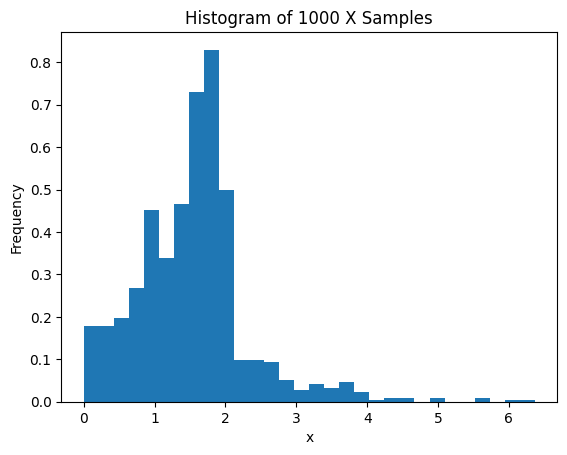

In [ ]:
import math
n = 1000
y = np.random.uniform(0,1,n)
x = []
for i in range(n):
  if y[i] <= 1-math.e**(-2):
    x.append((np.log(y[i]*(math.e**2) + 1)))
  else:
    x.append((-1 * np.log(1-y[i])))
plt.hist(x, bins=30, density=True,)
plt.title("Histogram of 1000 X Samples")
plt.xlabel("x")
plt.ylabel('Frequency')

<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.


To perform acceptance-rejection algorithm, we need to find the max of our pdf.

f(x)' = $(20x^3 + 12x^2 + 6x)/4$

The derivative of f(x) is always positive on [0,1], so f(x) always increases. So x=1 is the max.

f(1) = (5+4+3+1)/4 = 13/4

So M = 13/4

In [ ]:
M = 13/4
def generate_accept_reject_sample():
    while True:
        z1 = np.random.uniform(0,1)
        z2 = M * np.random.uniform(0,1)
        if z2 <= (5*z1**4 + 4*z1**3 + 3*z1**2 + 1)/4:
            return z1

In [ ]:
generate_accept_reject_sample()

0.4957973687053817

<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

### Ans.


In [ ]:
M = 13/4
def generate_accept_reject_sample_gen():
    count = 0
    while True:
        count+=1
        z1 = np.random.uniform(0,1)
        z2 = M * np.random.uniform(0,1)
        if z2 <= (5*z1**4 + 4*z1**3 + 3*z1**2 + 1)/4:
            return count
avg = 0
for i in range(10000):
  avg += generate_accept_reject_sample_gen()
print(round(avg/10000,2))

3.23


<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

Text(0, 0.5, 'Frequency')

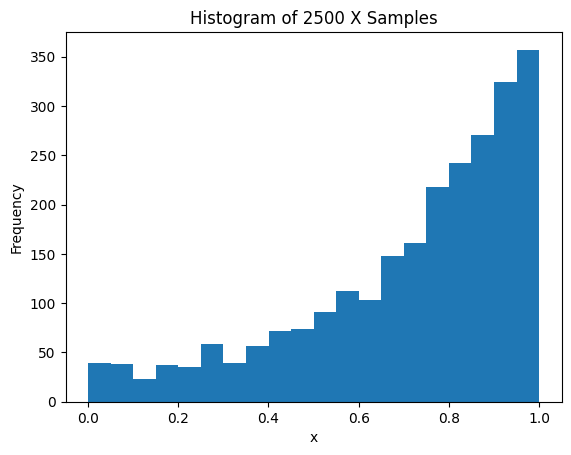

In [ ]:
samples = []
for i in range(2500):
  samples.append(generate_accept_reject_sample())
plt.hist(samples, bins=20)
plt.title("Histogram of 2500 X Samples")
plt.xlabel("x")
plt.ylabel('Frequency')

<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a $Laplace$ (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

CDF $G(x)$:

For $x < 0$:

$$
G(x) = \int_{-\infty}^{x} \frac{1}{2} e^{t} \, dt = \frac{e^x}{2}
$$

For $x \geq 0$:

$$
G(x) = \int_{-\infty}^{0} \frac{1}{2} e^t \, dt + \int_{0}^{x} \frac{1}{2} e^{-t} \, dt
= \frac{1}{2} + \frac{1}{2}(1 - e^{-x})
= 1 - \frac{e^{-x}}{2}
$$


G(0) = 1-e^0/2 = 1/2, so the boundary is 1/2.

If y<1/2:

y = $e^x/2$ -> x = ln(2y)

If y>=1/2:

y = 1 - $e^x / 2$ -> x = -ln(2-2y)

In [ ]:
import math
def generate_laplace_samples(n):
  y = np.random.uniform(0,1,n)
  x = []
  for i in range(n):
    if y[i] < 1/2:
      x.append(np.log(2*y[i]))
    else:
      x.append(-1*np.log(2-2*y[i]))
  return x

Text(0, 0.5, 'Frequency')

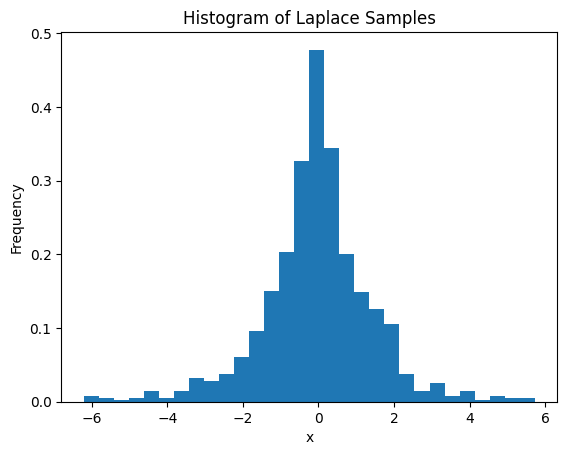

In [ ]:
x = generate_laplace_samples(1000)
plt.hist(x, bins=30, density=True,)
plt.title("Histogram of Laplace Samples")
plt.xlabel("x")
plt.ylabel('Frequency')

<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

### Ans.

$k \geq f(x) / g(x)$

$ = k \geq \frac{e^{-x^2/2}}{\sqrt{2\pi}} / e^{-|x|}/2$

$ = \frac{2}{\sqrt 2\pi} e^{-|x|-x^2/2}$

This function is symmetrical and has a max at 0. Thus, the smallest value of k is the max of this function, which is approx 0.79788

In [ ]:
def generate_normal_with_laplace():
    M = 0.79788
    while True:
      u = np.random.uniform(0,1)
      if u < 0.5:
          y = np.log(2*u)
      else:
          y = -np.log(2*(1-u))

      u2 = np.random.uniform()
      f = (1/np.sqrt(2*np.pi)) * np.exp(-y**2 / 2)
      g = 0.5 * np.exp(-abs(y))

      if u2 <= f / (M * g):
          return y

def generate_normal_with_laplace_count():
    M = 0.79788
    count=0
    while True:
      count+=1
      u = np.random.uniform(0,1)
      if u < 0.5:
          y = np.log(2*u)
      else:
          y = -np.log(2*(1-u))

      u2 = np.random.uniform()
      f = (1/np.sqrt(2*np.pi)) * np.exp(-y**2 / 2)
      g = 0.5 * np.exp(-abs(y))

      if u2 <= f / (M * g):
          return count

In [ ]:
avg = 0
for i in range(10000):
  avg += generate_normal_with_laplace_count()
print("Expected number of samples generated: " + str(avg/10000))


Expected number of samples generated: 1.0904


<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

In [ ]:
samples = []
count = []
for i in range(1000):
  samples.append(generate_normal_with_laplace())
  count.append(generate_normal_with_laplace_count() * 2)

Text(0, 0.5, 'Frequency')

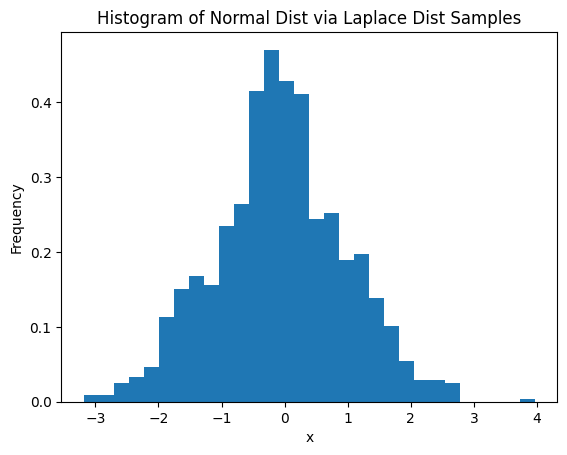

In [ ]:
plt.hist(samples, bins=30, density=True,)
plt.title("Histogram of Normal Dist via Laplace Dist Samples")
plt.xlabel("x")
plt.ylabel('Frequency')

In [ ]:
print('Mean Number of U[0,1] Used: ' + str(np.mean(count)))
print("95% Confidence Interval: [" + str(np.percentile(count, 2.5)) + ',' \
      + str(np.percentile(count, 97.5)) + ']')



Mean Number of U[0,1] Used: 2.2
95% Confidence Interval: [2.0,4.0]


<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

The CDF for a Cauchy distribution is $G(x) = \frac{1}{\pi} arctan(x) + 1/2$.

$Y = \frac{1}{\pi} arctan(x) + 1/2 -> x = tan(\pi(y-0.5))$

In [ ]:
def generate_cauchy_samples(n):
  y = np.random.uniform(0,1,n)
  x = []
  for i in range(n):
    x.append(np.tan(np.pi * (y - 0.5)))
  return x

Text(0, 0.5, 'Frequency')

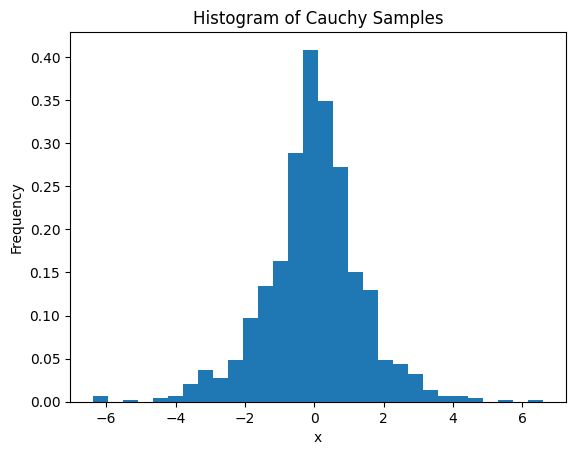

In [ ]:
x = generate_laplace_samples(1000)
plt.hist(x, bins=30, density=True,)
plt.title("Histogram of Cauchy Samples")
plt.xlabel("x")
plt.ylabel('Frequency')

<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

### Ans.

$k \geq f(x) / g(x)$

$ = k \geq \frac{2}{\sqrt 2\pi} (1+x^2) e^{-x^2/2}$

$ = \sqrt{\pi/2}(1+x^2)e^{-x^2/2}$

$$
derivative
=\sqrt{\pi/2} ( 2x e^{-x^2/2} + (1+x^2)(-x) e^{-x^2/2} )
= \sqrt{\pi/2} * x (1 - x^2) e^{-x^2/2}.
$$

When derivative = 0, x=0, 1, -1

When x=0, our function equals $\sqrt {\pi/2}$

When x = +-1, our function equals $\sqrt {\pi/2} * 2e^{-1/2}$

Thus, the max and the k value is $\sqrt {\pi/2} * 2e^{-1/2}$ or about 1.52035

In [ ]:
def generate_normal_with_cauchy():
    M = 1.52035
    while True:
      u = np.random.uniform(0,1)
      y = np.tan(np.pi * (u - 0.5))

      u2 = np.random.uniform()
      f = (1/np.sqrt(2*np.pi)) * np.exp(-y**2 / 2)
      g = 1 / (np.pi * (1 + y**2))

      if u2 <= f / (M * g):
          return y

def generate_normal_with_cauchy_count():
    M = 1.52035
    count = 0
    while True:
      count +=1
      u = np.random.uniform(0,1)
      y = np.tan(np.pi * (u - 0.5))

      u2 = np.random.uniform()
      f = (1/np.sqrt(2*np.pi)) * np.exp(-y**2 / 2)
      g = 1 / (np.pi * (1 + y**2))

      if u2 <= f / (M * g):
          return count

In [ ]:
avg = 0
for i in range(10000):
  avg += generate_normal_with_cauchy_count()
print("Expected number of samples generated: " + str(avg/10000))

Expected number of samples generated: 1.528


In [ ]:
samples = []
count = []
for i in range(1000):
  samples.append(generate_normal_with_cauchy())
  count.append(generate_normal_with_cauchy_count() * 2)

Text(0, 0.5, 'Frequency')

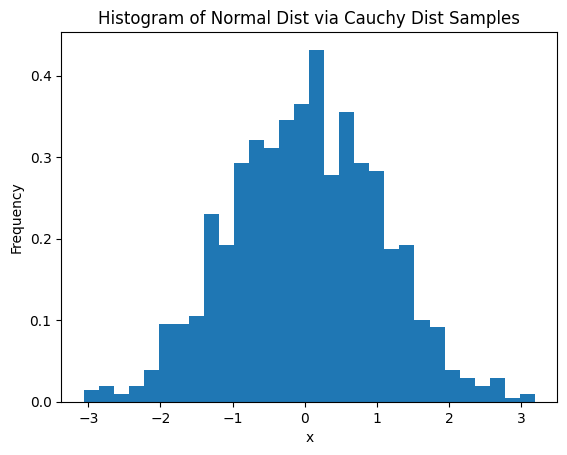

In [ ]:
plt.hist(samples, bins=30, density=True,)
plt.title("Histogram of Normal Dist via Cauchy Dist Samples")
plt.xlabel("x")
plt.ylabel('Frequency')

In [ ]:
print('Mean Number of U[0,1] Used: ' + str(np.mean(count)))
print("95% Confidence Interval: [" + str(np.percentile(count, 2.5)) + ',' \
      + str(np.percentile(count, 97.5)) + ']')

Mean Number of U[0,1] Used: 3.028
95% Confidence Interval: [2.0,8.0]
